

# MACHINE LEARNING

# **Healthcare_Stroke Prediction**



# **INTRODUCTION**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This analysis of dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues. According to the Centers for Disease Control and Prevention (CDC)Trusted Source, stroke is a leading cause of death in the United States. Every year, more than 795,000 U.S. people have a stroke. Without oxygen, brain cells and tissue become damaged and begin to die within minutes

There are three primary types of strokes: Transient ischemic attack (TIA) involves a blood clot that typically reverses on its own. Ischemic stroke involves a blockage caused by either a clot or plaque in the artery. The symptoms and complications of ischemic stroke can last longer than those of a TIA, or may become permanent. Hemorrhagic stroke is caused by either a burst or leaking blood vessel that seeps into the brain..A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. Through the analysis,we find out what kind of people are likely to suffer strock

**DOMAIN:**Due to the potentially fatal implications of a stroke, stroke prediction is a serious and crucial field of healthcare. A stroke happens when the blood flow to the brain suddenly stops, either because of a blockage (ischemic stroke) or a blood vessel rupture (hemorrhagic stroke). The brain is deprived of oxygen and nutrients as a result of this disruption, which can cause death or serious brain cell damage.

**PROBLEM STATEMENT:** To predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# **Loading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing the dataset
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Data Understanding**

-features and its datatypes

-column names of dataset

-values of each column of dataset

-count of gender

-summary of dataset

In [ ]:
#features and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#column names of dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#values of each column of dataset
df.values

array([[9046, 'Male', 67.0, ..., 36.6, 'formerly smoked', 1],
       [51676, 'Female', 61.0, ..., nan, 'never smoked', 1],
       [31112, 'Male', 80.0, ..., 32.5, 'never smoked', 1],
       ...,
       [19723, 'Female', 35.0, ..., 30.6, 'never smoked', 0],
       [37544, 'Male', 51.0, ..., 25.6, 'formerly smoked', 0],
       [44679, 'Female', 44.0, ..., 26.2, 'Unknown', 0]], dtype=object)

In [ ]:
#count of gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#summary of dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Preprocessing Data**

-dealing with missing values

-drop the row has other label in gender

-removing unnecessary column

-dropping duplicate data

In [ ]:
##dealing with missing values
#finding the missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#filling the missing values
print(df['bmi'].mean())
print(df['bmi'].median())


28.893236911794666
28.1


In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
#drop the row has other label in gender
df = df.drop(df[df['gender']=='Other'].index)
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
#dropping the duplicate datas
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


**Converting the age column (continuos variable)**

In [ ]:
def grouping(col,cut_points,label=None):
 minval=col.min()
 maxval=col.max()
 break_points=[minval] + cut_points + [maxval]
 print(break_points)
 colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
 return colBin


In [ ]:
cut_points=[15,64];
labels=['Children','working_class','senior']
df['age_groups']= grouping(df['age'],cut_points,labels)
df

[0.08, 15, 64, 82.0]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,working_class
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,working_class
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,senior
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,senior
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,working_class
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,working_class


**Removing unwanted columns and values**

In [ ]:
#removing unwanted columns and values
unwanted_values=df[df['smoking_status']=='Unknown'].index
df.drop(unwanted_values,inplace=True)
df1=df.drop(['id','age','ever_married','work_type'],axis=1)
df1

,gender,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,Male,0,1,Urban,228.69,36.600000,formerly smoked,1,senior
1,Female,0,0,Rural,202.21,28.893237,never smoked,1,working_class
2,Male,0,1,Rural,105.92,32.500000,never smoked,1,senior
3,Female,0,0,Urban,171.23,34.400000,smokes,1,working_class
4,Female,1,0,Rural,174.12,24.000000,never smoked,1,senior
...,...,...,...,...,...,...,...,...,...
5102,Female,0,0,Rural,77.93,21.700000,never smoked,0,working_class
5105,Female,1,0,Urban,83.75,28.893237,never smoked,0,senior
5106,Female,0,0,Urban,125.20,40.000000,never smoked,0,senior
5107,Female,0,0,Rural,82.99,30.600000,never smoked,0,working_class


# **Labelling**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
labelencoder = LabelEncoder()
oe1=OrdinalEncoder(categories=[['never smoked','formerly smoked','smokes']])
oe2=OrdinalEncoder(categories=[['Children','working_class','senior']])
df1['gender'] = labelencoder.fit_transform(df1['gender'])
df1['Residence_type'] = labelencoder.fit_transform(df1['Residence_type'])
df1['smoking_status']=oe1.fit_transform(df1[['smoking_status']])
df1['age_groups']=oe2.fit_transform(df1[['age_groups']])
df1

,gender,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,1,0,1,1,228.69,36.600000,1.0,1,2.0
1,0,0,0,0,202.21,28.893237,0.0,1,1.0
2,1,0,1,0,105.92,32.500000,0.0,1,2.0
3,0,0,0,1,171.23,34.400000,2.0,1,1.0
4,0,1,0,0,174.12,24.000000,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...
5102,0,0,0,0,77.93,21.700000,0.0,0,1.0
5105,0,1,0,1,83.75,28.893237,0.0,0,2.0
5106,0,0,0,1,125.20,40.000000,0.0,0,2.0
5107,0,0,0,0,82.99,30.600000,0.0,0,1.0


# **Normalisation**

In [ ]:
#normalising the data
from sklearn import preprocessing
datacols=df1.columns
nor=preprocessing.MinMaxScaler().fit_transform(df1)
normalisedata=pd.DataFrame(nor,columns=datacols)
normalisedata

,gender,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
0,1.0,0.0,1.0,1.0,0.801265,0.311801,0.5,1.0,1.0
1,0.0,0.0,0.0,0.0,0.679023,0.216065,0.0,1.0,0.5
2,1.0,0.0,1.0,0.0,0.234512,0.260870,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0,0.536008,0.284472,1.0,1.0,0.5
4,0.0,1.0,0.0,0.0,0.549349,0.155280,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
3560,0.0,0.0,0.0,0.0,0.105300,0.126708,0.0,0.0,0.5
3561,0.0,1.0,0.0,1.0,0.132167,0.216065,0.0,0.0,1.0
3562,0.0,0.0,0.0,1.0,0.323516,0.354037,0.0,0.0,1.0
3563,0.0,0.0,0.0,0.0,0.128658,0.237267,0.0,0.0,0.5


# **EXPLORATORY DATA ANALYSIS**

**Histogram of Avg.Glucose Level**

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours means you have diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) means you have prediabetes

<function matplotlib.pyplot.show(close=None, block=None)>

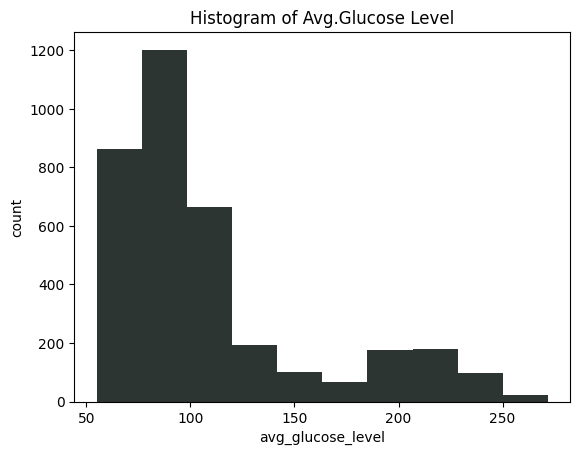

In [ ]:
plt.hist(df['avg_glucose_level'],color='#2C3532')
plt.title('Histogram of Avg.Glucose Level')
plt.xlabel('avg_glucose_level')
plt.ylabel('count')
plt.show

**Most of people have normal blood sugar level**

Histogram of BMI

If BMI is less than 18.5, it falls within the underweight range. If BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If BMI is 25.0 to 29.9, it falls within the overweight range.

<function matplotlib.pyplot.show(close=None, block=None)>

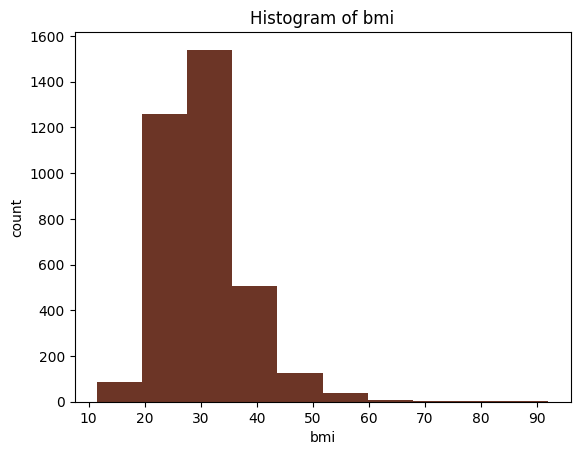

In [ ]:
plt.hist(df['bmi'],color='#6C3526')
plt.title('Histogram of bmi')
plt.xlabel('bmi')
plt.ylabel('count')
plt.show

**Pie chart for stroke and no stroke**

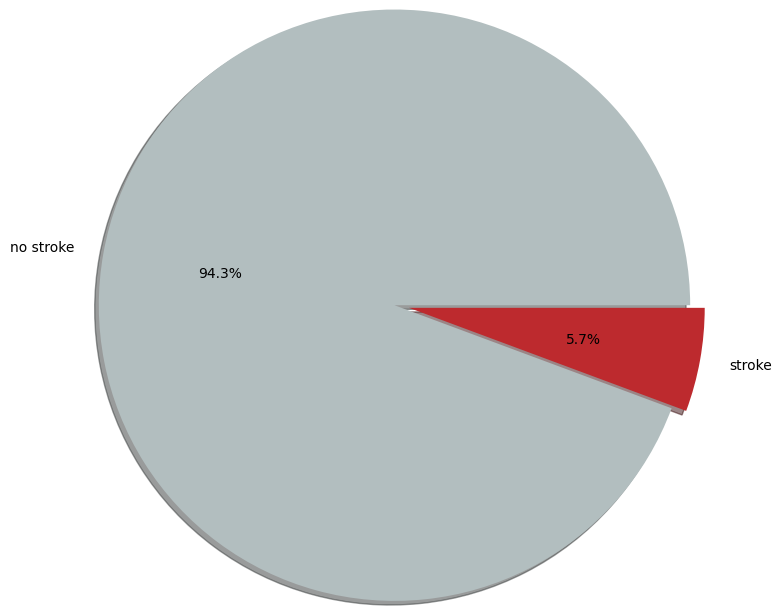

In [ ]:
pie_df=pd.DataFrame(df.groupby('stroke')['stroke'].count())
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()


**Avg. Glucose Level vs Age classified by the gender**

The normalAvg. Glucose Level is 150, so who has Avg. Glucose Level more than 150

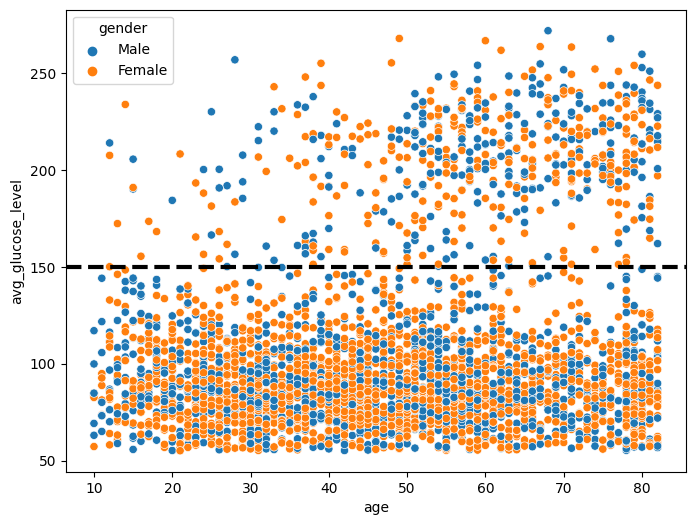

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.show()

**People after fifties are more to found with glucose level higher than normal**



**BMI vs Age classified by the gender**

The normal bmi is 25 so who has bmi more than 25

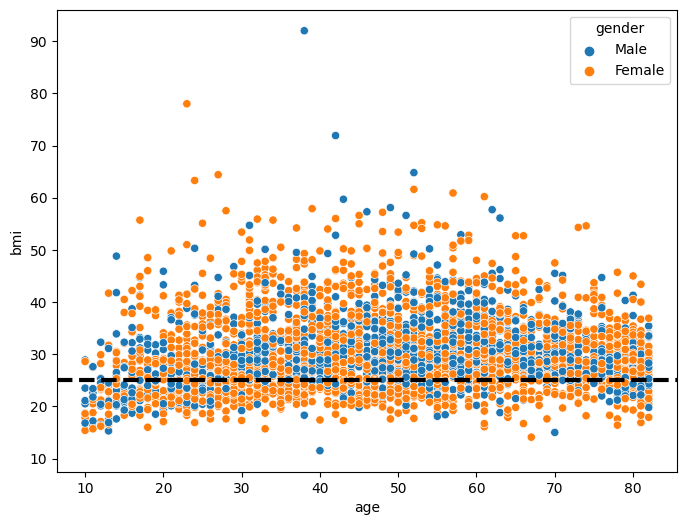

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

**There are a lot of people with a BMI above 25 who are overweight and obese**

**Stroke vs no stroke by BMI**

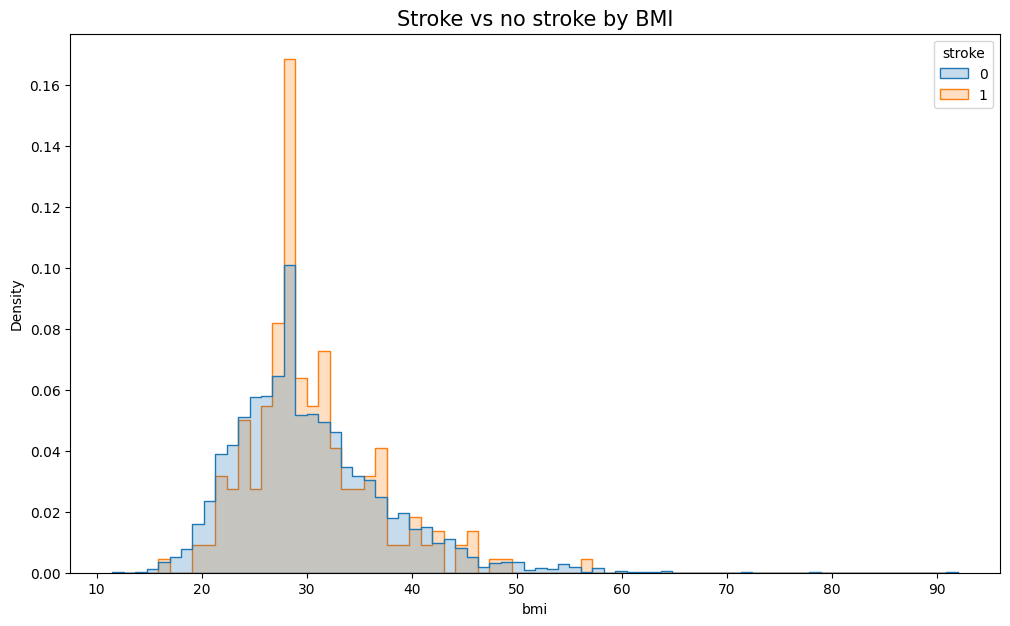

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
df, x="bmi", hue="stroke",
element="step",
stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

**The density of overweight people who suffered a stroke is more.**

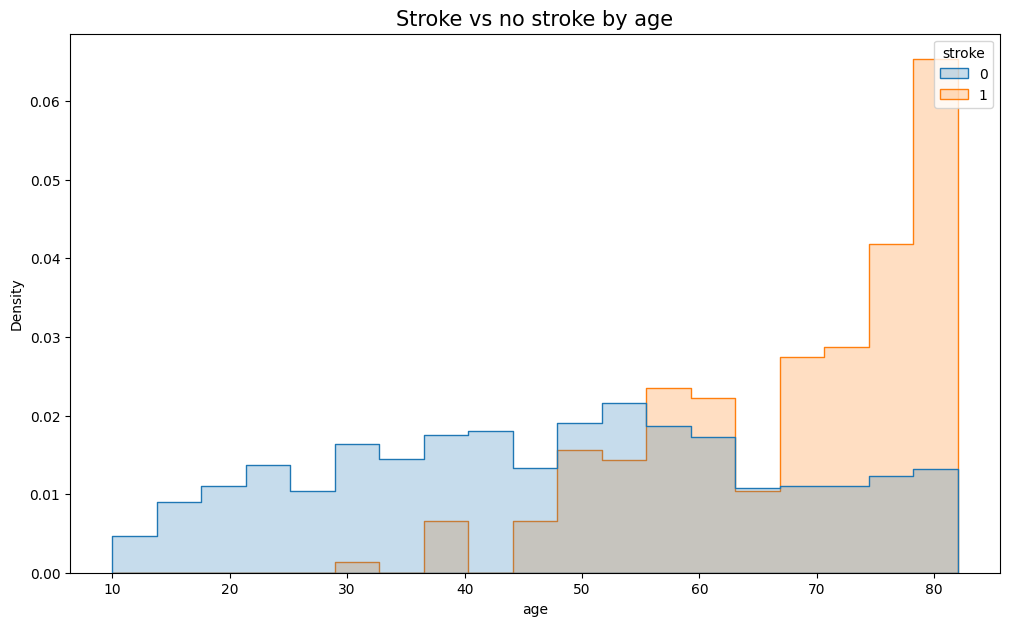

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
df, x="age", hue="stroke",
element="step",
stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

**The density of people having age above 50 suffered stroke more**

**Stroke vs no stroke by avg_glucose_level**

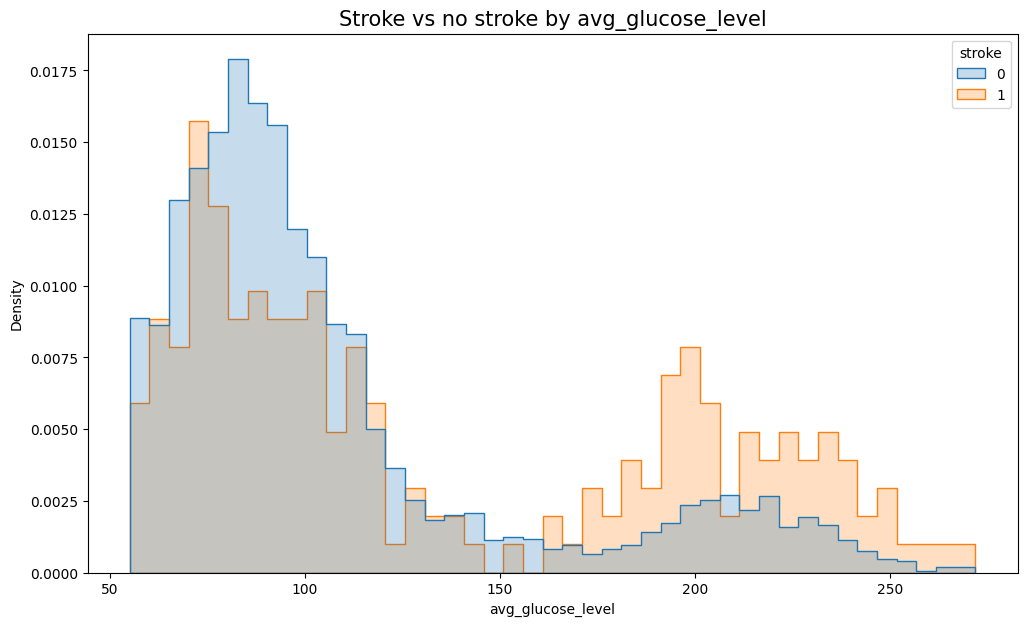

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
df, x="avg_glucose_level", hue="stroke",
element="step",
stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

# **DATA MODELING**

**Feature selection and splitting the data**

In [ ]:
#features
feature_cols = ['gender','hypertension','heart_disease','Residence_type','avg_glucose_level','bmi','smoking_status','age_groups']
X = normalisedata[feature_cols ]
#target variable
y =normalisedata.iloc[:, -2].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
from imblearn.over_sampling import SMOTE
#"Apply SMOTE to oversample the minority class.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Applying Parametric Algorithms**

**Naive Bayes**

**Logistic Regression**

**Neural Network**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
modelle_namen = {"Naive Bayes": GaussianNB(),
          "Logistic Regression": LogisticRegression(max_iter=1000, C=0.1),
          "Neural network": MLPClassifier(max_iter=1000, random_state=42) # max_iter 500 habe versucht, aber nicht genug.
         }

In [ ]:
def fit_score(modelle, X_train, y_train, X_test, y_test):
     modell_test_score = {}

     for name, modell in modelle_namen.items():
            modell.fit(X_train, y_train)
            modell_test_score[name] = modell.score(X_test, y_test)

     return modell_test_score

modelle = fit_score(modelle_namen, X_train, y_train, X_test, y_test)
modelle

{'Naive Bayes': 0.8757009345794392,
 'Logistic Regression': 0.9429906542056075,
 'Neural network': 0.9439252336448598}

In [ ]:
modelle_resampled = fit_score(modelle_namen, X_train_resampled, y_train_resampled, X_test, y_test)
modelle_resampled

{'Naive Bayes': 0.7289719626168224,
 'Logistic Regression': 0.7467289719626168,
 'Neural network': 0.7981308411214953}

**Confusion Matrix and Classification Reports**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def report(modell, X_train, y_train, X_test, y_test):

    for name, modell in modelle_namen.items():

        y_train_pred = modell.predict(X_train)
        y_pred = modell.predict(X_test)

        print(f'------------{name}-------------')
        print("Test_Set")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred, zero_division=0))
        print()
        print("Train_Set")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred, zero_division=0))
        print('--------------------------------')

In [ ]:
report(modelle_namen, X_train, y_train, X_test, y_test)

------------Naive Bayes-------------
Test_Set
[[735 274]
 [ 16  45]]
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      1009
         1.0       0.14      0.74      0.24        61

    accuracy                           0.73      1070
   macro avg       0.56      0.73      0.54      1070
weighted avg       0.93      0.73      0.80      1070


Train_Set
[[1763  591]
 [  46   95]]
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85      2354
         1.0       0.14      0.67      0.23       141

    accuracy                           0.74      2495
   macro avg       0.56      0.71      0.54      2495
weighted avg       0.93      0.74      0.81      2495

--------------------------------
------------Logistic Regression-------------
Test_Set
[[757 252]
 [ 19  42]]
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85      1009
         1.0       0

# **Non-parametric Algorithm**

**Support Vector Machine**

**K-Nearest Classifier**

**Decision Tree**

**Random Forest**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
modelle_name = {"SVC": SVC(),
          "KNN": KNeighborsClassifier(n_neighbors=6, weights='distance', n_jobs=-1),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features= 'auto',
                                                    min_samples_leaf = 10, min_samples_split= 4, n_estimators= 100)
         }


In [ ]:
def fit_score(modells, X_train, y_train, X_test, y_test):
     modell_test_score = {}

     for name, modell in modelle_name.items():
            modell.fit(X_train, y_train)
            modell_test_score[name] = modell.score(X_test, y_test)

     return modell_test_score

modells = fit_score(modelle_namen, X_train, y_train, X_test, y_test)
modells

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'SVC': 0.9429906542056075,
 'KNN': 0.9327102803738317,
 'Decision Tree': 0.8869158878504673,
 'Random Forest': 0.9429906542056075}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
def report(modell, X_train, y_train, X_test, y_test):

    for name, modell in modelle_name.items():

        y_train_pred = modell.predict(X_train)
        y_pred = modell.predict(X_test)

        print(f'------------{name}-------------')
        print("Test_Set")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred, zero_division=0))
        print()
        print("Train_Set")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred, zero_division=0))
        print('--------------------------------')

In [ ]:
report(modelle_name, X_train, y_train, X_test, y_test)

------------SVC-------------
Test_Set
[[1009    0]
 [  61    0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1009
         1.0       0.00      0.00      0.00        61

    accuracy                           0.94      1070
   macro avg       0.47      0.50      0.49      1070
weighted avg       0.89      0.94      0.92      1070


Train_Set
[[2354    0]
 [ 141    0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2354
         1.0       0.00      0.00      0.00       141

    accuracy                           0.94      2495
   macro avg       0.47      0.50      0.49      2495
weighted avg       0.89      0.94      0.92      2495

--------------------------------
------------KNN-------------
Test_Set
[[997  12]
 [ 60   1]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1009
         1.0       0.08      0.02      0

# **Conclusion**
From the visual analysis,we can conclude that people having glucose level less than 100,having age above 50,having overweight are likely to be suffered from stroke.And moreover people having glucose level above 150 are suffering diabetes and there are a lot of people with a BMI above 25 who are overweight and obese

From scientific research, The older you are, the more likely you are to have a stroke. The chance of having a stroke about doubles every 10 years after age 55. Although stroke is common among older adults, many people younger than 65 years also have strokes.

Blood glucose is often elevated in acute stroke, and higher admission glucose levels are associated with larger lesions, greater mortality and poorer functional outcome. In patients treated with thrombolysis, hyperglycemia is associated with an increased risk of hemorrhagic transformation of infarcts.

Repeated studies estimate that each unit increase in body mass index (BMI) increases the risk of stroke by 5 percent. With a baseline BMI of 20, this means that a person with a BMI of 30, for example, increases their risk of stroke by 50 percent.

From the analyis of dataset,the results matches with the scientific studies about stroke

